# Domácí úkol 1 (6 bodů)

## Úkoly

1. (1b) Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.
2. (1b) Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.
3. (1.5b) Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.
4. (1.5b) Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.
5. (1b) Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

## Řešení

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

### Zpracování souborů

In [2]:
K = 15
L = len("Martínek")
X = ((K*L*23) % (20)) + 1
X_file = '0'*(3-len(str(X)))+str(X)+'.txt'
Y = ((X + ((K*5 + L*7) % (19))) % (20)) + 1
Y_file = '0'*(3-len(str(Y)))+str(Y)+'.txt'

In [3]:
def read_whole_file(filename):
    with open(filename, 'r') as file:
        return file.read()

xfile = read_whole_file(X_file)
yfile = read_whole_file(Y_file)

### Příklad 1
#### Výpočet výběrové střední hodnoty a výběrového rozptylu
* U rozptylu bylo nutné jako parametr předat hodnotu 1 jako odečtení stupně volnosti, aby byl rozptyl nestranný.

#### Grafické znázornění četností
* Vytvořili jsme grafy jak pro každý soubor zvlášť, tak pro soubory jako korpus.
* Jelikož v zadání byla řečena délka slov, vyfiltrovali jsme tečky a čárky přilepené ke slovům.

In [4]:
def get_word_lengths(file_str):
    word_list = file_str.split()
    return [len(word.replace(',', '').replace('.', '')) for word in word_list]

In [5]:
Xlengths = get_word_lengths(xfile)
Ylengths = get_word_lengths(yfile)

for lengths, name in [(Xlengths, 'X'), (Ylengths, 'Y')]:
    print("Soubor {}\nVýběrový průměr: {}\nVýběrový rozptyl: {}\n"
          .format(name, np.mean(lengths), np.var(lengths, ddof=1)))

Soubor X
Výběrový průměr: 4.379966887417218
Výběrový rozptyl: 4.1463091952572455

Soubor Y
Výběrový průměr: 4.6476595744680855
Výběrový rozptyl: 6.8297538874188986



In [6]:
x_length_set, x_length_counts = np.unique(Xlengths, return_counts=True)
y_length_set, y_length_counts = np.unique(Ylengths, return_counts=True)

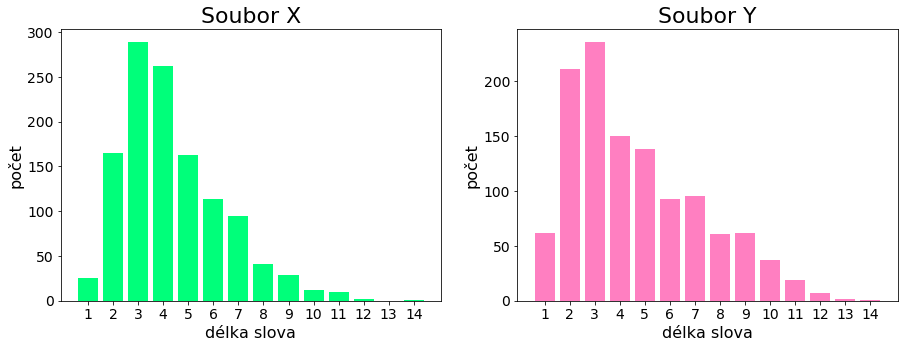

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].bar(x_length_set, x_length_counts, fc=(0, 1, 0.48, 1), lw=3)
axes[0].set_title('Soubor X', fontsize=22)
axes[1].bar(y_length_set, y_length_counts, fc=(1, 0, 0.52, 0.5), lw=3)
axes[1].set_title('Soubor Y', fontsize=22)
for ax in axes:
    ax.set_xticks(list(set(Xlengths + Ylengths)), )
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    ax.set_xlabel('délka slova', fontsize=16)
    ax.set_ylabel('počet', fontsize=16)
plt.show()

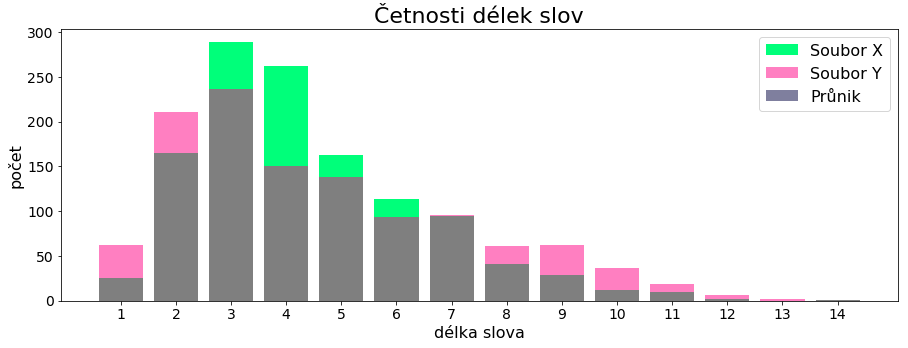

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.bar(x_length_set, x_length_counts, fc=(0, 1, 0.48, 1), lw=3)
ax.bar(y_length_set, y_length_counts, fc=(1, 0, 0.52, 0.5), lw=3)
ax.bar([1], [0], color=(0, 0, 0.249, 0.5))
ax.set_xticks(list(set(Xlengths + Ylengths)))
ax.set_xlabel('délka slova', fontsize=16)
ax.set_ylabel('počet', fontsize=16)
ax.set_title('Četnosti délek slov', fontsize=22)
plt.legend(['Soubor X', 'Soubor Y', 'Průnik'], fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

### Příklad 2

#### Grafické znázornění pravděpodobností symbolů
* Jelikož je v zadání řečeno "symboly mimo mezery", do statistik jsme započítali i znaky pro tečky a čárky.

In [9]:
xletters, xletter_cnt = np.unique(list(xfile.replace(" ", "")
                                       .replace("\n", "").lower()), 
                                  return_counts=True)
yletters, yletter_cnt = np.unique(list(yfile.replace(" ", "")
                                       .replace("\n", "").lower()), 
                                  return_counts=True)

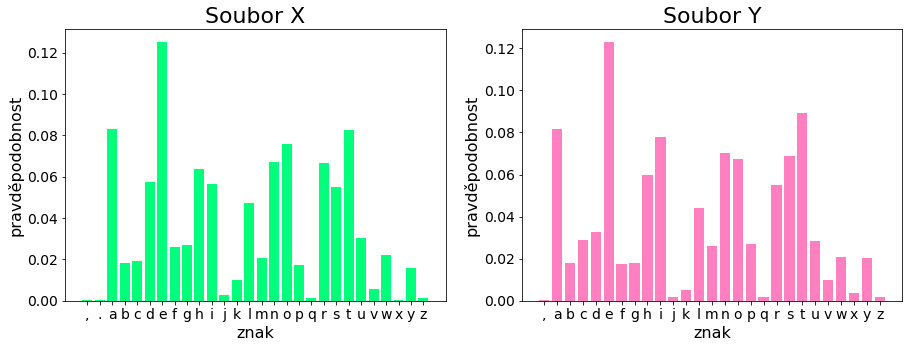

In [10]:
xletter_cnt_prob = xletter_cnt/xletter_cnt.sum()
yletter_cnt_prob = yletter_cnt/yletter_cnt.sum()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.bar(xletters, xletter_cnt_prob, color=(0, 1, 0.48, 1))
ax2.bar(yletters, yletter_cnt_prob, color=(1, 0, 0.52, 0.5))
for tick in ax1.xaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax1.yaxis.get_major_ticks(): tick.label.set_fontsize(14)
for tick in ax2.xaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax2.yaxis.get_major_ticks(): tick.label.set_fontsize(14) 
ax1.set_xlabel('znak', fontsize=16)
ax1.set_ylabel('pravděpodobnost', fontsize=16)
ax1.set_title('Soubor X', fontsize=22)
ax2.set_xlabel('znak', fontsize=16)
ax2.set_ylabel('pravděpodobnost', fontsize=16)
ax2.set_title("Soubor Y", fontsize=22)
plt.show()

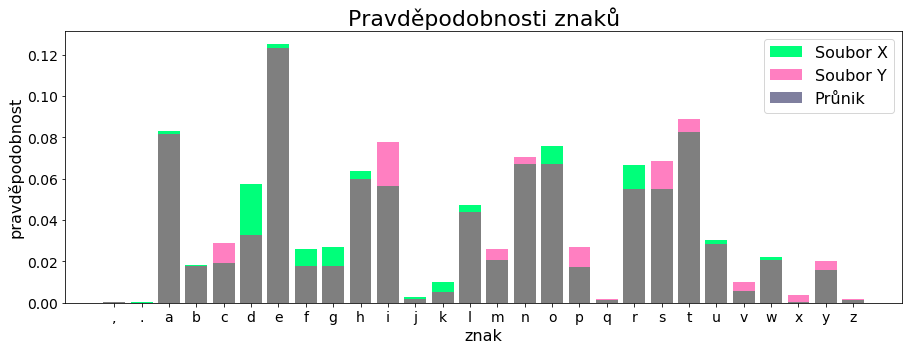

In [11]:
f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15,5))
plt.bar(xletters, xletter_cnt_prob, color=(0, 1, 0.48, 1))
plt.bar(yletters, yletter_cnt_prob, color=(1, 0, 0.52, 0.5))
plt.bar(['a'], [0], color=(0, 0, 0.249, 0.5))
plt.legend(['Soubor X', 'Soubor Y', 'Průnik'], fontsize=16)
for tick in ax1.xaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax1.yaxis.get_major_ticks(): tick.label.set_fontsize(14)
plt.xlabel("znak", fontsize=16)
plt.ylabel("pravděpodobnost", fontsize=16)
plt.title("Pravděpodobnosti znaků", fontsize=22)
plt.show()

### Příklad 3

#### Vytvoření kontingenční tabulky
* V případě četností < 5 se v našem algoritmu podle potřeby automaticky spojí biny.

#### Test samotný
* Samotný test pak probíhá klasickým způsobem a jeho výstup je znázoněn níže.

In [12]:
def two_counts_to_one(x_labels, x_counts, y_labels, y_counts):
    x = []
    y = []
    letters = []
    xi=0
    yi=0
    while (xi < len(x_labels) or yi < len(y_labels)):
        if x_labels[xi] == y_labels[yi]:
            x.append(x_counts[xi])
            y.append(y_counts[yi])
            letters.append(x_labels[xi])
            xi += 1
            yi += 1
        elif x_labels[xi] in y_labels:
            y.append(y_counts[yi])
            x.append(0)
            letters.append(y_labels[yi])
            yi += 1
        elif y_labels[yi] in x_labels:
            x.append(x_counts[xi])
            y.append(0)
            letters.append(x_labels[xi])
            xi += 1
    return x, y, letters

In [13]:
def merge_bins(x, y, letters):
    N = np.matrix([x,y])
    n = np.sum(N)
    Ni = np.sum(N, axis = 0)
    Nj = np.sum(N, axis = 1)
    fail = None
    while(True):
        for i in range(len(Ni)):
            for j in range(len(Ni)):
                if (Ni[0, i]*Nj[j, 0])/n < 5:
                    fail = (i, j)
                    break
            if fail is not None:
                break
        if fail:
            if fail[0] == len(letters):
                x[fail[0]-1] += x[fail[0]]
                y[fail[0]-1] += y[fail[0]]
                print("Merging \"{}\" and \"{}\"".format(letters[fail[0]-1], 
                                                         letters[fail[0]]))
                letters[fail[0]-1] += letters[fail[0]]
            else:
                x[fail[0]+1] += x[fail[0]]
                y[fail[0]+1] += y[fail[0]]
                print("Merging \"{}\" and \"{}\"".format(letters[fail[0]+1], 
                                                         letters[fail[0]]))
                letters[fail[0]+1] += letters[fail[0]]
            del x[fail[0]]
            del y[fail[0]]
            del letters[fail[0]]
            N = np.matrix([x,y])
            Ni = np.sum(N, axis = 0)
            Nj = np.sum(N, axis = 1)
            fail = None
            continue   
        break
    return N, n, len(letters)

In [14]:
def contingency_table_test(x_labels, x_counts, 
                           y_labels, y_counts, 
                           a = 0.05):
    # merge the two series with letters and their counts 
    # (convert to virtual contingency table)
    # then merge bins where (Ni. * N.j) / n < 5
    N, n, n_letters = merge_bins(*two_counts_to_one(x_labels, 
                                                    x_counts, 
                                                    y_labels, 
                                                    y_counts))
    
    # Výpočet teoretických četností + 
    # odhady marginálních pravděpodobností (parametrů)
    npp = np.matmul(np.sum(N, axis = 1)/n, np.sum(N, axis = 0)/n)*n
    # count test statictic
    chi, p, d, e = stats.chi2_contingency(N, correction = False)
    # critical value
    cval = stats.chi2.isf(0.05, n_letters)
    return n, npp, chi, cval, p, "Ano" if chi >= cval else "Ne"

In [15]:
n, npp, chi, cval, p, refuse = contingency_table_test(x_length_set, 
                                                      x_length_counts, 
                                                      y_length_set, 
                                                      y_length_counts, 
                                                      0.05)
print("Testová statistika:", chi)
print("Kritická hodnota", cval)
print("p-hodnota:", p)
print("Zamítáme?", refuse)

Testová statistika: 97.14868027055996
Kritická hodnota 23.684791304840576
p-hodnota: 5.9076610786033936e-15
Zamítáme? Ano


Zamítli jsme hypotézu $H_0$ (tedy nezávislost četností slov jednotlivých délek) ve prospěch $H_a$ (tedy rozdělení četností není nezávislé). $p$-hodnota je téměř nulová, tedy test je velmi silný. 

Tento test jsme neočekávali s tak jasným výsledkem i z důvodu poměrně krátkého textu, ale rozdělení četností pro jednotlivé délky slov není nezávislé. Tedy četnosti délek slov spíš odpovídají konkrétnímu jazyku než konkrétnímu textu a nebo může jít o text od stejného autora například.

### Příklad 4

#### Testování rovnosti středních hodnot
* Jelikož z první úlohy víme, že se rozptyly nerovnají, použili jsme test, který nepředpokládá roznost rozptylů.
* Protože je k výpočtu kritické hodnoty potřeba hodnota $n_d$ jako stupně volnosti, nebylo možné jednoduše použít funkci, ale bylo potřeba hodnotu manuálně vypočítat.

In [16]:
n = len(Xlengths)
m = len(Ylengths)
meanX = np.mean(Xlengths)
meanY = np.mean(Ylengths)
varX = np.var(Xlengths, ddof=1)
varY = np.var(Ylengths, ddof=1)

sd = np.sqrt(varX/n + varY/m)
T = (meanX - meanY)/sd
print("Testová statistika:", T)

nd = (sd**4)/(1/(n-1)*(varX/n)**2 + 1/(m-1)*(varY/m)**2)

p_val = 2*stats.t.sf(np.abs(T), df = nd)
print("p-hodnota:", p_val)

krit = stats.t.isf(0.05/2, df = nd)
print("Kriticka hodnota:", krit)

print("Zamítáme:", "Ano" if np.abs(T) >= krit else "Ne", "\n")

# the easy way but without the critical value
#print(stats.ttest_ind(Xlengths, Ylengths, equal_var = False))

Testová statistika: -2.784098872865385
p-hodnota: 0.005413212227311425
Kriticka hodnota: 1.9610342501606424
Zamítáme: Ano 



Zamítli jsme hypotézu $H_0$ (rovnost středních hodnot) ve prospěch $H_a$ (tedy, že se střední hodnoty nerovnají). $p$-hodnota vyšla 0,5 procenta, což lze také brát za poměrně silný test. Test jsme prováděli s předpokladen nerovnosti rozptylů.

Z vypočítaných výběrových středních hodnot jsme spíš očekávali rovnost středních hodnot, avšak test předpoklad vyvrátil, tedy se nerovnají. 

### Příklad 5

#### Vytvoření kontingenční tabulky
* V případě četností < 5 se v našem algoritmu podle potřeby automaticky spojí biny.

#### Test samotný
* Samotný test pak probíhá klasickým způsobem a jeho výstup je znázoněn níže.

In [17]:
n, npp, chi, cval, p, refuse = contingency_table_test(xletters, 
                                                      xletter_cnt, 
                                                      yletters, 
                                                      yletter_cnt, 
                                                      0.05)
print()
print("Testová statistika:", chi)
print("Kritická hodnota", cval)
print("p-hodnota:", p)
print("Zamítáme?", refuse)

Merging "." and ","
Merging "a" and ".,"

Testová statistika: 157.1058270988993
Kritická hodnota 38.88513865983007
p-hodnota: 4.0805403234958455e-21
Zamítáme? Ano


Zamítli jsme hypotézu $H_0$ (tedy nezávislost pravděpodobností písmen v textech) ve prospěch $H_a$ (tedy pravděpodobnosti nejsou nezávislá). $P$-hodnota je téměř nulová, tedy test je velmi silný. 

Výsledek testu odpovídá očekávání. Očekávali jsme, že rozdělení písmen bude odpovídat jazyku než jednotlivým textům nebo autorům ve stejném jazyce.